# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
Model=RandomForestClassifier()

# Original Data

In [3]:
daily_DM=pd.read_csv("daily_DM.csv")
daily_DM.set_index(["Unnamed: 0"],inplace=True)

In [4]:
y=daily_DM.pop("Drought_Level")
x=daily_DM[["AWND","PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [5]:
y.value_counts()

0.0    5222
1.0    3171
Name: Drought_Level, dtype: int64

<AxesSubplot:ylabel='Drought_Level'>

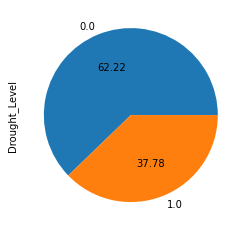

In [6]:
y.value_counts().plot.pie(autopct='%.2f')

In [7]:
train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=0.25,shuffle=False)

In [8]:
train_X_norm=preprocessing.normalize(train_X)
test_X_norm=preprocessing.normalize(test_X)

In [9]:
M1=Model
#M1.fit(train_X_norm,train_Y)
M1.fit(train_X,train_Y)

RandomForestClassifier()

In [10]:
#M1_prediction=M1.predict(test_X_norm)
M1_prediction=M1.predict(test_X)

In [11]:
ACC_1=accuracy_score(test_Y,M1_prediction)
print("Accuracy Score: %.2f" % ACC_1)
PCS_1=precision_score(test_Y,M1_prediction)
print("Precision Score: %.2f" % PCS_1)
RCL_1=recall_score(test_Y,M1_prediction)
print("Recall Score: %.2f" % RCL_1)

Accuracy Score: 0.60
Precision Score: 0.33
Recall Score: 0.32


# Random Undersampling

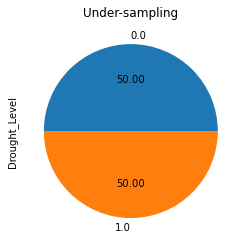

In [12]:
rus = RandomUnderSampler(sampling_strategy="not minority") # String
x_res, y_res = rus.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [13]:
y_res.value_counts()

0.0    3171
1.0    3171
Name: Drought_Level, dtype: int64

In [14]:
train_X_res,test_X_res,train_Y_res,test_Y_res=train_test_split(x_res,y_res,test_size=0.25,shuffle=False)

In [15]:
train_X_norm_res=preprocessing.normalize(train_X_res)
test_X_norm_res=preprocessing.normalize(test_X_res)

In [16]:
M2=Model
#M2.fit(train_X_norm_res,train_Y_res)
M2.fit(train_X_res,train_Y_res)

RandomForestClassifier()

In [17]:
#M2_prediction=M2.predict(test_X_norm)
M2_prediction=M2.predict(test_X)

In [18]:
ACC_2=accuracy_score(test_Y,M2_prediction)
print("Accuracy Score: %.2f" % ACC_2)
PCS_2=precision_score(test_Y,M2_prediction)
print("Precision Score: %.2f" % PCS_2)
RCL_2=recall_score(test_Y,M2_prediction)
print("Recall Score: %.2f" % RCL_2)

Accuracy Score: 0.71
Precision Score: 0.57
Recall Score: 0.19


# Random Oversampling

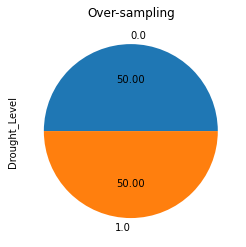

In [19]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_ros, y_ros = ros.fit_resample(x, y)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
y_ros.value_counts()

0.0    5222
1.0    5222
Name: Drought_Level, dtype: int64

In [21]:
train_X_ros,test_X_ros,train_Y_ros,test_Y_ros=train_test_split(x_ros,y_ros,test_size=0.25,shuffle=False)

In [22]:
train_X_norm_ros=preprocessing.normalize(train_X_ros)
test_X_norm_ros=preprocessing.normalize(test_X_ros)

In [23]:
M3=Model
#M3.fit(train_X_norm_ros,train_Y_ros)
M3.fit(train_X_ros,train_Y_ros)

RandomForestClassifier()

In [24]:
#M3_prediction=M3.predict(test_X_norm)
M3_prediction=M3.predict(test_X)

In [25]:
ACC_3=accuracy_score(test_Y,M3_prediction)
print("Accuracy Score: %.2f" % ACC_3)
PCS_3=precision_score(test_Y,M3_prediction)
print("Precision Score: %.2f" % PCS_3)
RCL_3=recall_score(test_Y,M3_prediction)
print("Recall Score: %.2f" % RCL_3)

Accuracy Score: 0.89
Precision Score: 0.83
Recall Score: 0.82


# Synthetic Minority Oversampling Technique (SMOTE)

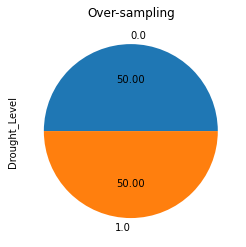

In [26]:
SMT = SMOTE()
x_smt, y_smt = SMT.fit_resample(x, y)
ax = y_smt.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [27]:
y_smt.value_counts()

0.0    5222
1.0    5222
Name: Drought_Level, dtype: int64

In [28]:
train_X_smt,test_X_smt,train_Y_smt,test_Y_smt=train_test_split(x_smt,y_smt,test_size=0.25,shuffle=False)

In [29]:
train_X_norm_smt=preprocessing.normalize(train_X_smt)
test_X_norm_smt=preprocessing.normalize(test_X_smt)

In [30]:
M4=Model
#M4.fit(train_X_norm_smt,train_Y_smt)
M4.fit(train_X_smt,train_Y_smt)

RandomForestClassifier()

In [31]:
#M4_prediction=M4.predict(test_X_norm)
M4_prediction=M4.predict(test_X)

In [32]:
ACC_4=accuracy_score(test_Y,M4_prediction)
print("Accuracy Score: %.2f" % ACC_4)
PCS_4=precision_score(test_Y,M4_prediction)
print("Precision Score: %.2f" % PCS_4)
RCL_4=recall_score(test_Y,M4_prediction)
print("Recall Score: %.2f" % RCL_4)

Accuracy Score: 0.89
Precision Score: 0.82
Recall Score: 0.81


# Metrics

In [33]:
summary = pd.DataFrame({'Type':['Original', 'Random Undersampling', 'Random Oversampling','SMOTE'],
                   'Accuracy Score':[ACC_1, ACC_2, ACC_3, ACC_4],
                   'Precision Score':[PCS_1, PCS_2, PCS_3, PCS_4],
                   'Recall Score':[RCL_1, RCL_2, RCL_3, RCL_4]})
summary

,Type,Accuracy Score,Precision Score,Recall Score
0,Original,0.602192,0.334992,0.317610
1,Random Undersampling,0.712244,0.574074,0.194969
2,Random Oversampling,0.894235,0.828571,0.820755
3,SMOTE,0.889948,0.824000,0.809748


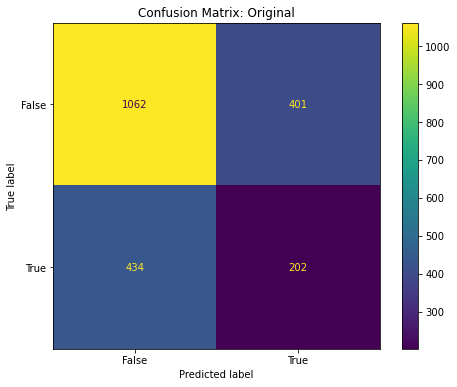

In [34]:
confusion_matrix = metrics.confusion_matrix(test_Y, M1_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: Original')
cm_display.plot(ax=ax)
plt.show()

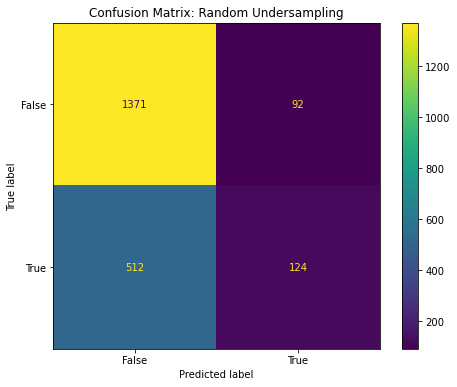

In [35]:
confusion_matrix = metrics.confusion_matrix(test_Y, M2_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: Random Undersampling')
cm_display.plot(ax=ax)
plt.show()

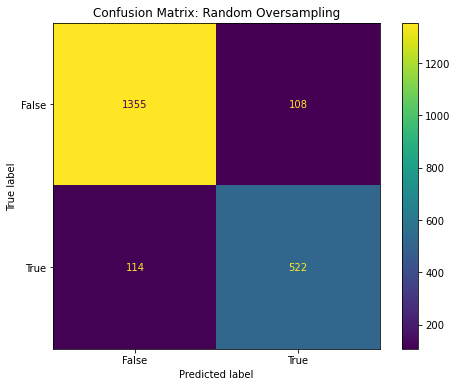

In [36]:
confusion_matrix = metrics.confusion_matrix(test_Y, M3_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: Random Oversampling')
cm_display.plot(ax=ax)
plt.show()

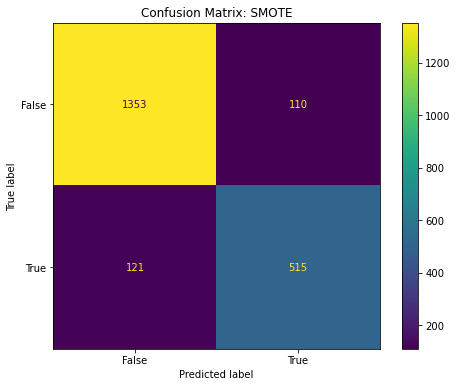

In [37]:
confusion_matrix = metrics.confusion_matrix(test_Y, M4_prediction)
fig, ax = plt.subplots(figsize=(8,6))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
ax.set(title='Confusion Matrix: SMOTE')
cm_display.plot(ax=ax)
plt.show()

In [38]:
r_probs = [0 for _ in range(len(test_Y))]
r_auc = roc_auc_score(test_Y, r_probs)
r_fpr, r_tpr, _ = roc_curve(test_Y, r_probs)
M1_fpr, M1_tpr, M1_thresholds = metrics.roc_curve(test_Y, M1_prediction)
M2_fpr, M2_tpr, M2_thresholds = metrics.roc_curve(test_Y, M2_prediction)
M3_fpr, M3_tpr, M3_thresholds = metrics.roc_curve(test_Y, M3_prediction)
M4_fpr, M4_tpr, M4_thresholds = metrics.roc_curve(test_Y, M4_prediction)
M1_auc = metrics.auc(M1_fpr, M1_tpr)
M2_auc = metrics.auc(M2_fpr, M2_tpr)
M3_auc = metrics.auc(M3_fpr, M3_tpr)
M4_auc = metrics.auc(M4_fpr, M4_tpr)

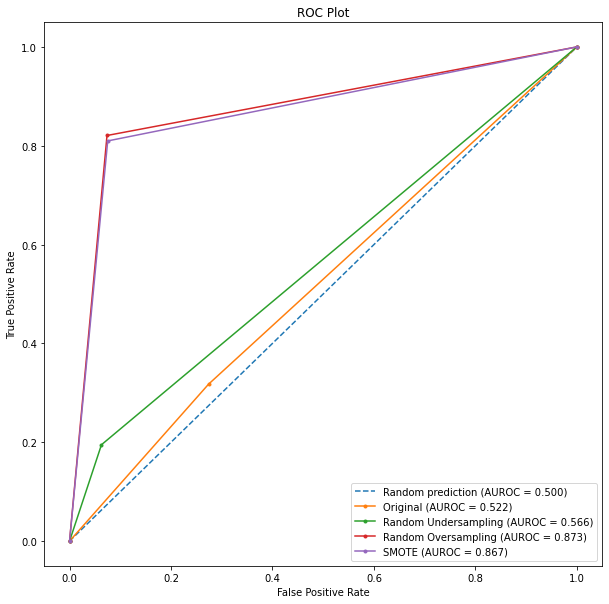

In [39]:
plt.figure(figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(M1_fpr, M1_tpr, marker='.', label='Original (AUROC = %0.3f)' % M1_auc)
plt.plot(M2_fpr, M2_tpr, marker='.', label='Random Undersampling (AUROC = %0.3f)' % M2_auc)
plt.plot(M3_fpr, M3_tpr, marker='.', label='Random Oversampling (AUROC = %0.3f)' % M3_auc)
plt.plot(M4_fpr, M4_tpr, marker='.', label='SMOTE (AUROC = %0.3f)' % M4_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

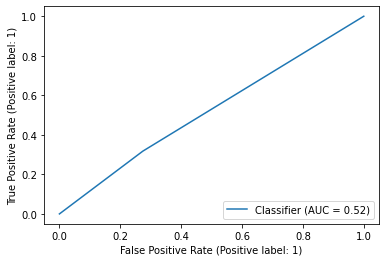

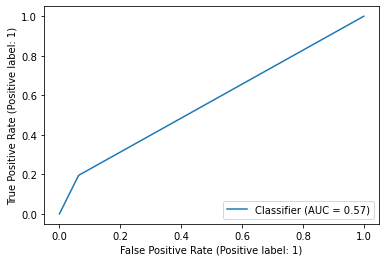

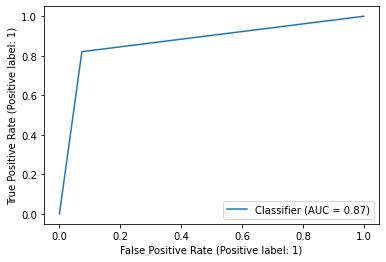

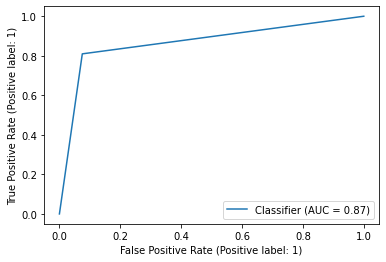

In [40]:
RocCurveDisplay.from_predictions(test_Y, M1_prediction)
RocCurveDisplay.from_predictions(test_Y, M2_prediction)
RocCurveDisplay.from_predictions(test_Y, M3_prediction)
RocCurveDisplay.from_predictions(test_Y, M4_prediction)
plt.show()